In [1]:
import numpy
import skrf

In [ ]:
def thru2x(thru_path, *args, **kwargs):
        if 'export_path' in kwargs:
            export_path = kwargs['export_path']
        else:
            export_path = '.\\'

        thru =  skrf.Network(thru_path)
        
        f_points = thru.frequency.npoints
        f_list   = thru.frequency

        s_fxr = numpy.zeros([f_points,2,2],dtype=numpy.complex128)
        s11_fxr = numpy.array([])
        s21_fxr = numpy.array([])
        s21_phase = numpy.array([])

        for i in range(0,f_points):
            s11_t = numpy.complex128(thru.s[i][0][0])
            s12_t = numpy.complex128(thru.s[i][0][1])
            s21_t = numpy.complex128(thru.s[i][1][0])
            s22_t = numpy.complex128(thru.s[i][1][1])

            s11_fxr = numpy.append(s11_fxr, numpy.divide((s11_t + s22_t), (2 + s12_t + s21_t)))        # Ref. (5) in [1]
            s21_fxr = numpy.append(s21_fxr, numpy.sqrt(0.5 * (s12_t + s21_t) * (1 - s11_fxr**2)))      # Ref. (6) in [1]
            s21_phase = numpy.append(s21_phase, numpy.angle(s21_fxr[i]) * 180/numpy.pi)

            # s12_fxr = s21_fxr
            # s22_fxr = s11_fxr
            # s_fxr[i] = [[s11_fxr, s12_fxr],[s21_fxr,s22_fxr]]
        pass

        x = s21_phase[1:len(s21_phase)] - s21_phase[0:len(s21_phase)-1]
        a = numpy.array([])
        for j in range(0, len(x)):
            a = numpy.append(a, ((x[j]<-90)*360+(x[j]>90)*(-360)))
        # a = numpy.cumsum(a)
        # a = numpy.insert(a, 0, 0)
        # s21_phase_unwrapped = s21_phase + a
        
        # print(a)
        print(s21_phase)


y = thru2x(r'.\cal_std\sim\thru.s2p', export_path=r'.\cal_std\sim') 

In [211]:
import random
import numpy
import matplotlib

phase = [146.4, -61.1, -73.5, -80.5, -85.3, -88.8, -91.7, -94.2, -96.4, -98.4, -100.3, -102.1, -103.7, -105.4, -106.9, -108.4, -109.9, -111.4, -112.8, -114.3, -115.7, -117.1, -118.5, -119.9, -121.4, -122.8, -124.2, -125.7, -127.1, -128.6, -130.1, -131.6, -133.1, -134.7, -136.3, -137.9, -139.6, -141.4, -143.1, -145, -146.9, -148.9, -150.9, -153.1, -155.4, -157.8, -160.4, -163.1, -166, -169.2, -172.6, -176.4, 179.4, 174.8, 169.6, 163.7, 157.1, 149.6, 141.2, -48.1, -58.2, -68.6, -79, -89, -98.3, -106.7, -114.3, -121.1, -127.2, -132.7, -137.7, -142.4, -146.7, -150.8, -154.6, -158.3, -161.9, -165.4, -168.9, -172.3, -175.7, -179, 177.6, 174.1, 170.6, 167, 163.3, 159.5, 155.6, 151.5, 147.2, 142.8, 138, 133.1, 127.8, 122.2, 116.3, 110.1, 103.6, 96.7, 89.7, -97.6, -104.9, -112.2, -119.3, -126.3, -133, -139.4, -145.5, -151.2, -156.5, -161.6, -166.3, -170.8, -175, -178.9, 177.3, 173.7, 170.2, 167, 163.8, 160.7, 157.8, 154.9, 152.1, 149.4, 146.8, 144.2, 141.6, 139.1, 136.6, 134.1, 131.6, 129.2, 126.7, 124.2, 121.7, 119.2, 116.6, 113.9, 111.2, 108.4, 105.4, 102.3, 99.1, 95.6, 91.8, 87.7, 83.3, 78.3, 72.7, 66.4, 59.3, 51.2, 42.2, 32.3, 21.8, 11.1, 0.8, -8.9, -17.6, 154.6, 147.8, 141.7, 136.4, 131.7, 127.4, 123.6, 120.1, 116.8, 113.8, 110.9, 108.2, 105.6, 103.2, 100.8, 98.5, 96.2, 94, 91.8, 89.7, 87.5, 85.4, 83.2, 81.1, 78.9, 76.7, 74.4, 72.1, 69.7, 67.3, 64.7, 62, 59.2, 56.2, 52.9, 49.5, 45.7, 41.5, 36.8, 31.6, 25.7, 19, 11.4, -177.2, 173.2, 162.8, 152, 141.2, 130.9, 121.5, 113.1, 105.6, 99, 93.2, 88, 83.3, 79, 75.1, 71.4, 68, 64.8, 61.7, 58.7, 55.8, 53.1, 50.3, 47.7, 45, 42.4, 39.8, 37.2, 34.6, 32, 29.3, 26.7, 24, 21.2, 18.4, 15.6, 12.7, 9.7, 6.6, 3.4, 0, -3.4, -7.1, -10.9, -14.9, -19.1, -23.6, -28.4, -33.6, -39.1, -45, -51.3, -58.1, -65.3, -72.8, -80.6, 91.4, 83.4, 75.5, 67.9, 60.6, 53.7, 47.2, 41.1, 35.4, 30.1, 25.2, 20.6, 16.2, 12.1, 8.2, 4.4, 0.8, -2.6, -6, -9.2, -12.4, -15.6, -18.7, -21.8, -24.9, -28, -31.2, -34.4, -37.7, -41.1, -44.6, -48.3, -52.3, -56.5, -61.1, -66, -71.5, -77.6, -84.3, -91.8, -100.1, -109, -118.5, -128.2, -137.9, -147.1, -155.6, -163.4, 9.7, 3.5, -2, -6.9, -11.3, -15.3, -18.9, -22.2, -25.2, -28, -30.7, -33.1, -35.4, -37.6, -39.7, -41.7, -43.7, -45.5, -47.3, -49, -50.7, -52.4, -54, -55.6, -57.1, -58.6, -60.1, -61.6, -63.1, -64.6, -66.1, -67.5, -69, -70.5, -72, -73.6, -75.1, -76.7, -78.4, -80.1, -82, -84, -86.2, -88.8, -91.9, -95.9, -101.9, -112.9, 39.1, -25, -60, -72.9, -79.7, -84.1, -87.6, -90.5, -93.1, -95.5, -97.9, -100.1, -102.3, -104.6, -106.9, -109.2, -111.5, -113.9, -116.5, -119.1, -121.8, -124.6, -127.5, -130.6, -133.9, -137.2, -140.8, -144.5, -148.4, -152.5, -156.7, -161, -165.5, -170.1, -174.8, -179.5, 175.8, 171.1, 166.4, 161.9, 157.4, 153.1, 149, 145, 141.2, 137.5, 134, 130.6, 127.4, 124.4, 121.4, 118.6, 115.9, 113.3, 110.7, 108.3, -74.1, -76.4, -78.7, -80.9, -83, -85.2, -87.3, -89.4, -91.4, -93.5, -95.5, -97.5, -99.6, -101.6, -103.7, -105.7, -107.8, -109.9, -112, -114.2, -116.4, -118.6, -120.9, -123.2, -125.5, -128, -130.4, -132.9, -135.5, -138.2, -140.9, -143.6, -146.4, -149.3, -152.3, -155.3, -158.3, -161.4, -164.8, -167.2, -170.6, -173.9, -177.1, 179.7, 176.5, 173.4, 170.2, 167.1, 164, 161, 158.1, 155.2, 152.3, 149.5, 146.8, 144.2, 141.6, 139.1, 136.7, 134.3, 132, 129.7, 127.5, 125.4, 123.3, 121.2, 119.3, 117.3, 115.4, 113.5, 111.7, 109.9, 108.1, 106.3, 104.6, 102.9, 101.2, 99.5, 97.9, 96.2, 94.5, 92.9, 91.2, 89.6, 87.9, 86.2, 84.5, 82.8, 81, 79.2, 77.4, 75.6, 73.6, 71.7, 69.6, 67.5, 65.3, 63.1, 60.7, 58.1, 55.5, 52.7, 49.7, 46.4, -137, -140.7, -144.7, -148.9, -153.6, -158.5, -163.9, -169.6, -175.6, 178, 171.5, 164.8, 158.1, 151.4, 144.9, 138.7, 132.7, 126.9, 121.4, 116, 110.8, 105.6, 100.2, 94.2, 87.2, 77.7, 62.6, 33.5, -12.5, 134.9, 118.6, 109.2, 102.9, 98.2, 94.4, 91.1, 88.2, 85.7, 83.3, 81.1, 79, 77, 75.1, 73.3, 71.5, 69.8, 68.1, 66.4, 64.8, 63.2, 61.6, 60, 58.4, 56.9, 55.3, 53.8, 52.2, 50.7, 49.1, 47.6, 46, 44.4, 42.8, 41.2, 39.6, 37.9, 36.2, 34.5, 32.8, 31.1, 29.3, 27.5, 25.6, 23.7, 21.8, 19.8, 17.7, 15.6, 13.4, 11.1, 8.8, 6.4, 3.8, 1.2, -1.6, -4.6, -7.7, -11.1, -14.7, -18.6, -22.8, -27.5, -32.6, -38.4, -44.9, -52.4, -60.8, -70.4, -81, -92.6, -104.8, 63.2, 51.6, 41, 31.3, 22.7, 14.9, 7.7, 1.2, -5, -10.9, -16.5, -22.1, -27.5, -33.1, -38.6, -44.4, -50.3, -56.4, -62.8, -69.6, -76.6, 96.1, 88.4, 80.6, 72.6, 64.7, 56.8, 49.2, 41.9, 34.9, 28.4, 22.3, 16.6, 11.3, 6.3, 1.7, -2.6, -6.7, -10.5, -14.1, -17.6, -20.8, -23.9, -26.9, -29.8, -32.5, -35.2, -37.7, -40.2, -42.6, -45, -47.3, -49.6, -51.8, -54, -56.1, -58.3, -60.4, -62.5, -64.5, -66.6, -68.7, -70.7, -72.8, -74.9, -77, -79.1, -81.2, -83.4, -85.6, -87.9, -90.2, -92.6, -95.1, -97.7, -100.4, -103.3, -106.4, -109.6, -113.1, -116.9, -121, -125.6, -130.6, -136.3, -142.6, -149.7, -157.7, -166.5, -176, 174, 163.9, 154.1, 144.8, 136.3, 128.5, 121.6, -64.7, -70.3, -75.5, -80.2, -84.7, -88.8, -92.8, -96.6, -100.3, -104, -107.7, -111.4, -115.2, -119.1, -123.2, -127.6, -132.3, -137.4, -143.1, -149.4, -156.5, 15.4, 6.2, -4, -15.1, -26.6, -38.1, -49, -58.9, -67.7, -75.4, -82.2, -88.2, -93.5, -98.3, -102.6, -106.6, -110.2, -113.7, -116.9, -120, -122.9, -125.7, -128.5, -131.1, -133.7, -136.2, -138.7, -141.1, -143.5, -145.8, -148.2, -150.5, -152.8, -155.1, -157.3, -159.6, -161.9, -164.1, -166.4, -168.7, -170.9, -173.2, -175.5, -177.8, 179.9, 177.5, 175.2, 172.8, 170.4, 168, 165.5, 162.9, 160.3, 157.7, 154.9, 152.1, 149.1, 146, 142.8, 139.3, 135.7, 131.7, 127.4, 122.6, 117.3, 111.2, 104.3, 96.3, 87.1, 76.5, -115.3, -128, -140.9, -153.3, -164.5, -174.6, 176.6, 168.9, 162, 155.7, 149.9, 144.4, 139.1, 133.8, 128.6, 123.2, 117.7, 111.8, 105.5, 98.7, 91.3, 83.3, 74.6, 65.3, 55.6, 45.9, 36.3, 27.3, 19, -168.5, -175.3, 178.7, 173.3, 168.4, 164.1, 160.1, 156.5, 153.2, 150.2, 147.4, 144.7, 142.2, 139.9, 137.6, 135.5, 133.5, 131.5, 129.7, 127.8, 126.1, 124.3, 122.7, 121, 119.4, 117.9, 116.3, 114.8, 113.3, 111.8, 110.3, 108.8, 107.3, 105.9, 104.4, 103, 101.5, 100, 98.5, 97.1, 95.6, 94, 92.5, 90.9, 89.3, 87.7, 86.1, 84.4, 82.6, 80.8, 78.9, 76.9, 74.9, 72.7, 70.2, 67.5, 64.4, 60.3, 53.9, 37.2, 116.1, 75.2, 65.6, 60.2, 56, 52.2, 48.6]
freq = [1000000000, 1010000000, 1020000000, 1030000000, 1040000000, 1050000000, 1060000000, 1070000000, 1080000000, 1090000000, 1100000000, 1110000000, 1120000000, 1130000000, 1140000000, 1150000000, 1160000000, 1170000000, 1180000000, 1190000000, 1200000000, 1210000000, 1220000000, 1230000000, 1240000000, 1250000000, 1260000000, 1270000000, 1280000000, 1290000000, 1300000000, 1310000000, 1320000000, 1330000000, 1340000000, 1350000000, 1360000000, 1370000000, 1380000000, 1390000000, 1400000000, 1410000000, 1420000000, 1430000000, 1440000000, 1450000000, 1460000000, 1470000000, 1480000000, 1490000000, 1500000000, 1510000000, 1520000000, 1530000000, 1540000000, 1550000000, 1560000000, 1570000000, 1580000000, 1590000000, 1600000000, 1610000000, 1620000000, 1630000000, 1640000000, 1650000000, 1660000000, 1670000000, 1680000000, 1690000000, 1700000000, 1710000000, 1720000000, 1730000000, 1740000000, 1750000000, 1760000000, 1770000000, 1780000000, 1790000000, 1800000000, 1810000000, 1820000000, 1830000000, 1840000000, 1850000000, 1860000000, 1870000000, 1880000000, 1890000000, 1900000000, 1910000000, 1920000000, 1930000000, 1940000000, 1950000000, 1960000000, 1970000000, 1980000000, 1990000000, 2000000000, 2010000000, 2020000000, 2030000000, 2040000000, 2050000000, 2060000000, 2070000000, 2080000000, 2090000000, 2100000000, 2110000000, 2120000000, 2130000000, 2140000000, 2150000000, 2160000000, 2170000000, 2180000000, 2190000000, 2200000000, 2210000000, 2220000000, 2230000000, 2240000000, 2250000000, 2260000000, 2270000000, 2280000000, 2290000000, 2300000000, 2310000000, 2320000000, 2330000000, 2340000000, 2350000000, 2360000000, 2370000000, 2380000000, 2390000000, 2400000000, 2410000000, 2420000000, 2430000000, 2440000000, 2450000000, 2460000000, 2470000000, 2480000000, 2490000000, 2500000000, 2510000000, 2520000000, 2530000000, 2540000000, 2550000000, 2560000000, 2570000000, 2580000000, 2590000000, 2600000000, 2610000000, 2620000000, 2630000000, 2640000000, 2650000000, 2660000000, 2670000000, 2680000000, 2690000000, 2700000000, 2710000000, 2720000000, 2730000000, 2740000000, 2750000000, 2760000000, 2770000000, 2780000000, 2790000000, 2800000000, 2810000000, 2820000000, 2830000000, 2840000000, 2850000000, 2860000000, 2870000000, 2880000000, 2890000000, 2900000000, 2910000000, 2920000000, 2930000000, 2940000000, 2950000000, 2960000000, 2970000000, 2980000000, 2990000000, 3000000000, 3010000000, 3020000000, 3030000000, 3040000000, 3050000000, 3060000000, 3070000000, 3080000000, 3090000000, 3100000000, 3110000000, 3120000000, 3130000000, 3140000000, 3150000000, 3160000000, 3170000000, 3180000000, 3190000000, 3200000000, 3210000000, 3220000000, 3230000000, 3240000000, 3250000000, 3260000000, 3270000000, 3280000000, 3290000000, 3300000000, 3310000000, 3320000000, 3330000000, 3340000000, 3350000000, 3360000000, 3370000000, 3380000000, 3390000000, 3400000000, 3410000000, 3420000000, 3430000000, 3440000000, 3450000000, 3460000000, 3470000000, 3480000000, 3490000000, 3500000000, 3510000000, 3520000000, 3530000000, 3540000000, 3550000000, 3560000000, 3570000000, 3580000000, 3590000000, 3600000000, 3610000000, 3620000000, 3630000000, 3640000000, 3650000000, 3660000000, 3670000000, 3680000000, 3690000000, 3700000000, 3710000000, 3720000000, 3730000000, 3740000000, 3750000000, 3760000000, 3770000000, 3780000000, 3790000000, 3800000000, 3810000000, 3820000000, 3830000000, 3840000000, 3850000000, 3860000000, 3870000000, 3880000000, 3890000000, 3900000000, 3910000000, 3920000000, 3930000000, 3940000000, 3950000000, 3960000000, 3970000000, 3980000000, 3990000000, 4000000000, 4010000000, 4020000000, 4030000000, 4040000000, 4050000000, 4060000000, 4070000000, 4080000000, 4090000000, 4100000000, 4110000000, 4120000000, 4130000000, 4140000000, 4150000000, 4160000000, 4170000000, 4180000000, 4190000000, 4200000000, 4210000000, 4220000000, 4230000000, 4240000000, 4250000000, 4260000000, 4270000000, 4280000000, 4290000000, 4300000000, 4310000000, 4320000000, 4330000000, 4340000000, 4350000000, 4360000000, 4370000000, 4380000000, 4390000000, 4400000000, 4410000000, 4420000000, 4430000000, 4440000000, 4450000000, 4460000000, 4470000000, 4480000000, 4490000000, 4500000000, 4510000000, 4520000000, 4530000000, 4540000000, 4550000000, 4560000000, 4570000000, 4580000000, 4590000000, 4600000000, 4610000000, 4620000000, 4630000000, 4640000000, 4650000000, 4660000000, 4670000000, 4680000000, 4690000000, 4700000000, 4710000000, 4720000000, 4730000000, 4740000000, 4750000000, 4760000000, 4770000000, 4780000000, 4790000000, 4800000000, 4810000000, 4820000000, 4830000000, 4840000000, 4850000000, 4860000000, 4870000000, 4880000000, 4890000000, 4900000000, 4910000000, 4920000000, 4930000000, 4940000000, 4950000000, 4960000000, 4970000000, 4980000000, 4990000000, 5000000000, 5010000000, 5020000000, 5030000000, 5040000000, 5050000000, 5060000000, 5070000000, 5080000000, 5090000000, 5100000000, 5110000000, 5120000000, 5130000000, 5140000000, 5150000000, 5160000000, 5170000000, 5180000000, 5190000000, 5200000000, 5210000000, 5220000000, 5230000000, 5240000000, 5250000000, 5260000000, 5270000000, 5280000000, 5290000000, 5300000000, 5310000000, 5320000000, 5330000000, 5340000000, 5350000000, 5360000000, 5370000000, 5380000000, 5390000000, 5400000000, 5410000000, 5420000000, 5430000000, 5440000000, 5450000000, 5460000000, 5470000000, 5480000000, 5490000000, 5500000000, 5510000000, 5520000000, 5530000000, 5540000000, 5550000000, 5560000000, 5570000000, 5580000000, 5590000000, 5600000000, 5610000000, 5620000000, 5630000000, 5640000000, 5650000000, 5660000000, 5670000000, 5680000000, 5690000000, 5700000000, 5710000000, 5720000000, 5730000000, 5740000000, 5750000000, 5760000000, 5770000000, 5780000000, 5790000000, 5800000000, 5810000000, 5820000000, 5830000000, 5840000000, 5850000000, 5860000000, 5870000000, 5880000000, 5890000000, 5900000000, 5910000000, 5920000000, 5930000000, 5940000000, 5950000000, 5960000000, 5970000000, 5980000000, 5990000000, 6000000000, 6010000000, 6020000000, 6030000000, 6040000000, 6050000000, 6060000000, 6070000000, 6080000000, 6090000000, 6100000000, 6110000000, 6120000000, 6130000000, 6140000000, 6150000000, 6160000000, 6170000000, 6180000000, 6190000000, 6200000000, 6210000000, 6220000000, 6230000000, 6240000000, 6250000000, 6260000000, 6270000000, 6280000000, 6290000000, 6300000000, 6310000000, 6320000000, 6330000000, 6340000000, 6350000000, 6360000000, 6370000000, 6380000000, 6390000000, 6400000000, 6410000000, 6420000000, 6430000000, 6440000000, 6450000000, 6460000000, 6470000000, 6480000000, 6490000000, 6500000000, 6510000000, 6520000000, 6530000000, 6540000000, 6550000000, 6560000000, 6570000000, 6580000000, 6590000000, 6600000000, 6610000000, 6620000000, 6630000000, 6640000000, 6650000000, 6660000000, 6670000000, 6680000000, 6690000000, 6700000000, 6710000000, 6720000000, 6730000000, 6740000000, 6750000000, 6760000000, 6770000000, 6780000000, 6790000000, 6800000000, 6810000000, 6820000000, 6830000000, 6840000000, 6850000000, 6860000000, 6870000000, 6880000000, 6890000000, 6900000000, 6910000000, 6920000000, 6930000000, 6940000000, 6950000000, 6960000000, 6970000000, 6980000000, 6990000000, 7000000000, 7010000000, 7020000000, 7030000000, 7040000000, 7050000000, 7060000000, 7070000000, 7080000000, 7090000000, 7100000000, 7110000000, 7120000000, 7130000000, 7140000000, 7150000000, 7160000000, 7170000000, 7180000000, 7190000000, 7200000000, 7210000000, 7220000000, 7230000000, 7240000000, 7250000000, 7260000000, 7270000000, 7280000000, 7290000000, 7300000000, 7310000000, 7320000000, 7330000000, 7340000000, 7350000000, 7360000000, 7370000000, 7380000000, 7390000000, 7400000000, 7410000000, 7420000000, 7430000000, 7440000000, 7450000000, 7460000000, 7470000000, 7480000000, 7490000000, 7500000000, 7510000000, 7520000000, 7530000000, 7540000000, 7550000000, 7560000000, 7570000000, 7580000000, 7590000000, 7600000000, 7610000000, 7620000000, 7630000000, 7640000000, 7650000000, 7660000000, 7670000000, 7680000000, 7690000000, 7700000000, 7710000000, 7720000000, 7730000000, 7740000000, 7750000000, 7760000000, 7770000000, 7780000000, 7790000000, 7800000000, 7810000000, 7820000000, 7830000000, 7840000000, 7850000000, 7860000000, 7870000000, 7880000000, 7890000000, 7900000000, 7910000000, 7920000000, 7930000000, 7940000000, 7950000000, 7960000000, 7970000000, 7980000000, 7990000000, 8000000000, 8010000000, 8020000000, 8030000000, 8040000000, 8050000000, 8060000000, 8070000000, 8080000000, 8090000000, 8100000000, 8110000000, 8120000000, 8130000000, 8140000000, 8150000000, 8160000000, 8170000000, 8180000000, 8190000000, 8200000000, 8210000000, 8220000000, 8230000000, 8240000000, 8250000000, 8260000000, 8270000000, 8280000000, 8290000000, 8300000000, 8310000000, 8320000000, 8330000000, 8340000000, 8350000000, 8360000000, 8370000000, 8380000000, 8390000000, 8400000000, 8410000000, 8420000000, 8430000000, 8440000000, 8450000000, 8460000000, 8470000000, 8480000000, 8490000000, 8500000000, 8510000000, 8520000000, 8530000000, 8540000000, 8550000000, 8560000000, 8570000000, 8580000000, 8590000000, 8600000000, 8610000000, 8620000000, 8630000000, 8640000000, 8650000000, 8660000000, 8670000000, 8680000000, 8690000000, 8700000000, 8710000000, 8720000000, 8730000000, 8740000000, 8750000000, 8760000000, 8770000000, 8780000000, 8790000000, 8800000000, 8810000000, 8820000000, 8830000000, 8840000000, 8850000000, 8860000000, 8870000000, 8880000000, 8890000000, 8900000000, 8910000000, 8920000000, 8930000000, 8940000000, 8950000000, 8960000000, 8970000000, 8980000000, 8990000000, 9000000000, 9010000000, 9020000000, 9030000000, 9040000000, 9050000000, 9060000000, 9070000000, 9080000000, 9090000000, 9100000000, 9110000000, 9120000000, 9130000000, 9140000000, 9150000000, 9160000000, 9170000000, 9180000000, 9190000000, 9200000000, 9210000000, 9220000000, 9230000000, 9240000000, 9250000000, 9260000000, 9270000000, 9280000000, 9290000000, 9300000000, 9310000000, 9320000000, 9330000000, 9340000000, 9350000000, 9360000000, 9370000000, 9380000000, 9390000000, 9400000000, 9410000000, 9420000000, 9430000000, 9440000000, 9450000000, 9460000000, 9470000000, 9480000000, 9490000000, 9500000000, 9510000000, 9520000000, 9530000000, 9540000000, 9550000000, 9560000000, 9570000000, 9580000000, 9590000000, 9600000000, 9610000000, 9620000000, 9630000000, 9640000000, 9650000000, 9660000000, 9670000000, 9680000000, 9690000000, 9700000000, 9710000000, 9720000000, 9730000000, 9740000000, 9750000000, 9760000000, 9770000000, 9780000000, 9790000000, 9800000000, 9810000000, 9820000000, 9830000000, 9840000000, 9850000000, 9860000000, 9870000000, 9880000000, 9890000000, 9900000000, 9910000000, 9920000000, 9930000000, 9940000000, 9950000000, 9960000000, 9970000000, 9980000000, 9990000000, 10000000000]



In [ ]:
# phase unwrap
import random
import numpy
import matplotlib
import matplotlib.pyplot

x = numpy.array(freq)
y = numpy.fromfile(r'D:\RF_Microwave_Library\de_embedding\cal_std\sim\s21.txt')

# y_unwrapped = numpy.unwrap(y, discont=180)

# matplotlib.pyplot.plot(x,y_unwrapped)



FileNotFoundError: [Errno 2] No such file or directory: '.\\de_embedding\\cal_std\\sim\\s21.txt'

[   0.    0.    0.    0. -360. -360. -360. -360. -360. -360. -360. -360.
 -360. -360. -360.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 -360. -360. -360. -360. -360. -360. -360. -360. -360. -360. -360.    0.
    0.    0.    0.    0.    0.    0.    0.    0. -360. -360. -360. -360.
 -360. -360.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[ 0.00000000e+00  1.83673469e+01  5.51020408e+01  1.10204082e+02
 -1.76326531e+02 -8.81632653e+01 -1.83673469e+01  3.30612245e+01
  6.61224490e+01  8.08163265e+01  7.71428571e+01  5.51020408e+01
  1.46938776e+01 -4.40816327e+01 -1.21224490e+02  1.54285714e+02
  8.81632653e+01  4.04081633e+01  1.10204082e+01  1.77635684e-15
  7.34693878e+00  3.30612245e+01  7.71428571e+01  1.39591837e+02
 -1.39591837e+02 -5.87755102e+01  3.67346939e+00  4.77551020e+01
  7.34693878e+01  8.08163265e+01  6.97959184e+01  4.04081633e+01
 -7.34693878e+00 -7.

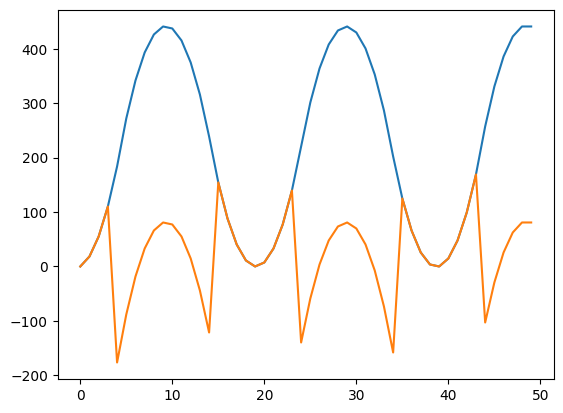

In [213]:
# phase unwrap
import random
import matplotlib
import matplotlib.pyplot

# x = numpy.array(random.sample(range(0,180), 10))
# x = numpy.cumsum(x)

a= numpy.linspace(0,5*numpy.pi)
x = numpy.arcsin(numpy.sin(a)) * 180/numpy.pi
x = numpy.cumsum(x)
matplotlib.pyplot.plot(x)

def wrap_offset_calculator(x :list):
    wrap_offset = numpy.array([])
    for i in range(0,len(x)):
        if (x[i] > 180):
            wrap_offset = numpy.append(wrap_offset, -360)
        elif (x[i] < -180):
            wrap_offset = numpy.append(wrap_offset, 360)
        else:
            wrap_offset = numpy.append(wrap_offset, 0)
    return wrap_offset

wrap_offset = numpy.array([])
while(numpy.sum(numpy.abs(wrap_offset)) != 0 or wrap_offset.size == 0):
    wrap_offset = wrap_offset_calculator(x)
    print(wrap_offset)
    x = x + wrap_offset

# wrap_offset = numpy.array([])
# for i in range(0,len(x)):
#     wrapN = numpy.divmod(x[i], 180)[0]
#     if (x[i]<-180):
#         wrap_offset = numpy.append(wrap_offset, 360)
#     else:
#         wrap_offset = numpy.append(wrap_offset, 0)
# print(wrap_offset)
# x = x + wrap_offset


print(x)
matplotlib.pyplot.plot(x)